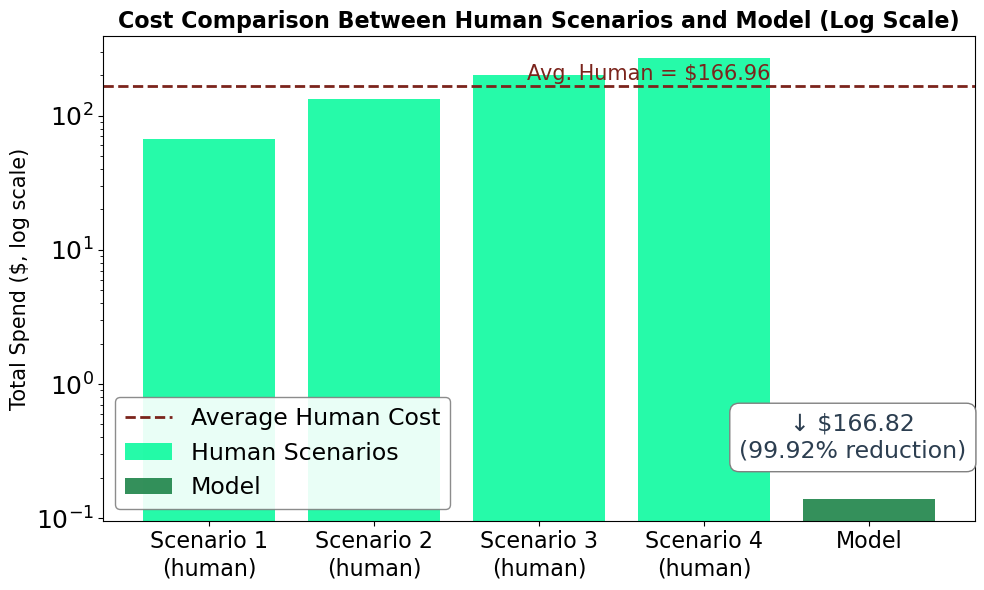

In [109]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Dados
data = {
    "Scenario": ["Scenario 1 (human)", "Scenario 2 (human)", "Scenario 3 (human)", "Scenario 4 (human)", "Model"],
    "Total spend ($)": [66.785, 133.57, 200.355, 267.14, 0.14]
}

df = pd.DataFrame(data)

# Cálculos de melhorias
baseline_mean = df[df["Scenario"].str.contains("human")]["Total spend ($)"].mean()
model_cost = df.loc[df["Scenario"] == "Model", "Total spend ($)"].values[0]

absolute_improvement = baseline_mean - model_cost
relative_improvement = (absolute_improvement / baseline_mean) * 100

# Figura
plt.figure(figsize=(10, 6))

# Barras humanas
plt.bar(df["Scenario"][:-1], df["Total spend ($)"][:-1],
        color="#00FA9A", alpha=0.85, label="Human Scenarios")

# Barra do modelo
plt.bar("Model", model_cost, color="#1e8449", alpha=0.9, label="Model")

# Linha da média humana
plt.axhline(y=baseline_mean, color="#7b241c", linestyle="--", linewidth=2, label="Average Human Cost")

# Escala logarítmica
plt.yscale("log")

# Anotações
plt.text(3.4, baseline_mean * 1.1, f"Avg. Human = ${baseline_mean:.2f}",
         color="#7b241c", fontsize=15, ha="right")

# Anotação do reduction movida para dentro do gráfico
plt.text(3.9, 0.4,  # Posição ajustada para dentro do gráfico
         f"↓ ${absolute_improvement:.2f}\n({relative_improvement:.2f}% reduction)",
         color="#2c3e50", fontsize=17, ha="center", va="center",
         bbox=dict(facecolor="white", edgecolor="gray", boxstyle="round,pad=0.4"))

# Títulos e estilo
plt.title("Cost Comparison Between Human Scenarios and Model (Log Scale)", fontsize=16, weight="bold")
plt.ylabel("Total Spend ($, log scale)", fontsize=15)

# Labels do eixo X com quebras de linha
x_labels = ["Scenario 1\n(human)", "Scenario 2\n(human)", "Scenario 3\n(human)", "Scenario 4\n(human)", "Model"]
plt.xticks(range(len(df["Scenario"])), x_labels, fontsize=16, ha='center')
plt.yticks(fontsize=18)
#plt.grid(axis="y", linestyle="--", alpha=0.5, which="both")

# Legenda com caixa branca e posicionada dentro do gráfico
plt.legend(frameon=True, fontsize=17, loc='lower left', 
           facecolor='white', edgecolor='gray', framealpha=0.9)

plt.tight_layout()
plt.savefig('comp.pdf', dpi=300)
plt.show()